In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
folder_path = r'harth' # folder path where all the files are stored
all_files = os.listdir(folder_path) # list of all files in the folder
df_list = [] # list to store all the dataframes
for file in all_files:
    df = pd.read_csv(folder_path + '/' + file) # read the file
    df_list.append(df) 
df = pd.concat(df_list) # concatenate all the dataframes

Μεχρί εδώ ενσωματώσαμε τα δεδομένα μας σε ένα ενιαίο dataframe για να μπορέσουμε να δουλέψουμε ευκολότερα.
Τρέχοντας την εντολή df.describe() λαμβάνουμε μια γενική ιδέα του dataframe αυτού και με το df.count() μπορούμε να δούμε το πλήθος της κάθε στήλης του dataframe μας.

In [3]:
df.describe()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,index,Unnamed: 0
count,6.461328e+06,6.461328e+06,6.461328e+06,6.461328e+06,6.461328e+06,6.461328e+06,6.461328e+06,720639.000000,137646.000000
mean,-8.849574e-01,-1.326128e-02,-1.693779e-01,-5.948883e-01,2.087665e-02,3.749160e-01,6.783833e+00,195407.155799,68822.500000
std,3.775916e-01,2.311709e-01,3.647385e-01,6.263466e-01,3.884511e-01,7.360983e-01,1.143238e+01,111591.198157,39735.121914
min,-8.000000e+00,-4.307617e+00,-6.574463e+00,-8.000000e+00,-7.997314e+00,-8.000000e+00,1.000000e+00,0.000000,0.000000
25%,-1.002393e+00,-8.312914e-02,-3.720700e-01,-9.742110e-01,-1.000873e-01,-1.557138e-01,3.000000e+00,100151.000000,34411.250000
50%,-9.748998e-01,2.593677e-03,-1.374510e-01,-4.217309e-01,3.262909e-02,7.004390e-01,7.000000e+00,191640.000000,68822.500000
75%,-8.123032e-01,7.251000e-02,4.647321e-02,-1.678755e-01,1.549512e-01,9.486747e-01,7.000000e+00,285446.000000,103233.750000
max,2.291708e+00,6.491943e+00,4.909483e+00,7.999756e+00,7.999756e+00,8.406235e+00,1.400000e+02,424173.000000,137645.000000


In [4]:
df.count()

timestamp     6461328
back_x        6461328
back_y        6461328
back_z        6461328
thigh_x       6461328
thigh_y       6461328
thigh_z       6461328
label         6461328
index          720639
Unnamed: 0     137646
dtype: int64

Τρέχοντας τα παρατηρούμε ότι δύο στήλες το έχουν πλήθος δεδομένων μιας τάξης μικρότερο απο τις υπολοιπές οπότε τις ξεσκαρτάρουμε χρησιμοποιώντας την df.drop() και με την df.isna().sum() μετράμε πόσα απο τα δεδομένα στις υπόλοιπες στήλες είναι ΝΑ που θα προσέξουμε ότι είναι 0. Αυτό δεν σημαίνει απαραίτητα ότι όλα τα δεδομένα είναι καθαρά πλέον απλά πραγματοποιήσαμε ένα πρώτο καθαρισμό. Για αυτόν τον λόγο δημιουργούμε ένα νέο csv για να αποθηκεύσουμε το "καθαρό" μας dataframe τοπικά στον υπολογιστή μας.

In [5]:
df.drop(columns=['index', 'Unnamed: 0'], inplace=True)
nan_counts = df.isna().sum()

In [6]:
file_name = 'harth_cleaned.csv'
df.to_csv(file_name, index=False)

Τωρα εξετάζουμε για άλλες μορφες "κακων" δεδομένων όπως π.χ. τι ποσοστο κατέχει το κάθε label. Για υπενθύμιση τα labels σημαινουν : 
1: walking	
2: running	
3: shuffling
4: stairs (ascending)	
5: stairs (descending)	
6: standing	
7: sitting	
8: lying	
13: cycling (sit)	
14: cycling (stand)	
130: cycling (sit, inactive)
140: cycling (stand, inactive)

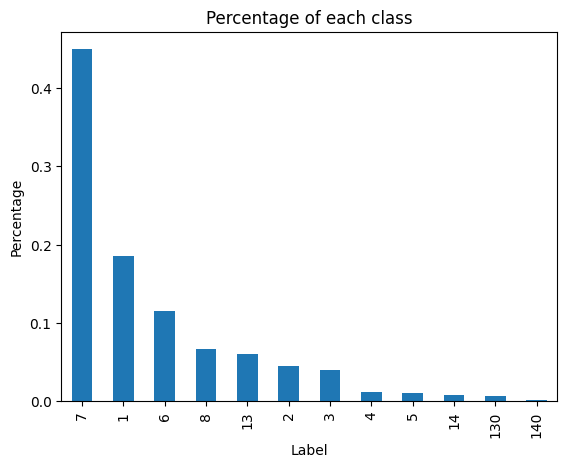

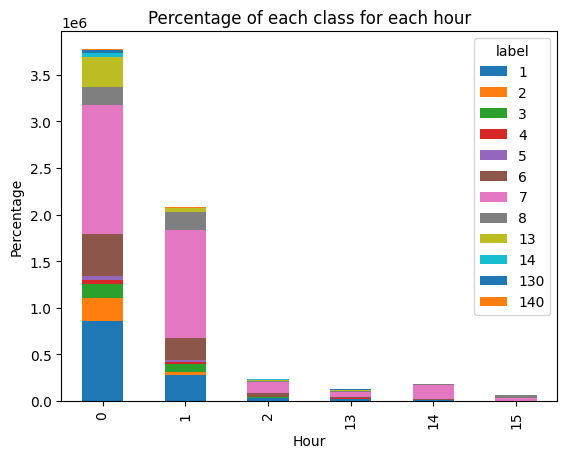

In [ ]:
df['label'].value_counts(normalize=True).plot(kind='bar')
plt.title('Percentage of each class')
plt.xlabel('Label')
plt.ylabel('Percentage')
plt.show()
#plot me for each hour of the "timestamp" column the count for each label normilized as a percentage of that hour
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df.groupby(['hour', 'label']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Percentage of each class for each hour')
plt.xlabel('Hour')
plt.ylabel('Percentage')
plt.show()

Πααρατηρούμε εδώ ότι οι ώρες παρουσιάζουν μια ασυνέχεια και μερικές τιμές ξεκινάνε απο 13. Για αυτόν τον λόγο στο συγκεκριμένο subject θα αφαιρέσω 13 ώρες απο την τιμή του για να το συγχρωνήσω με τα υπόλοιπα subjects.

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

cutoff_time = pd.to_datetime('13:00:00').time()

df.loc[df['timestamp'].dt.time > cutoff_time, 'timestamp'] -= pd.Timedelta(hours=13)

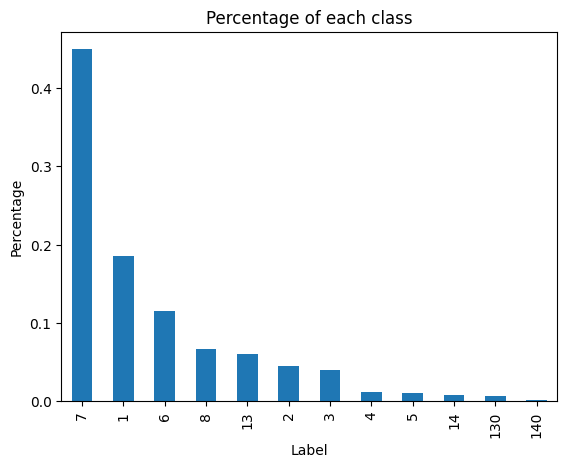

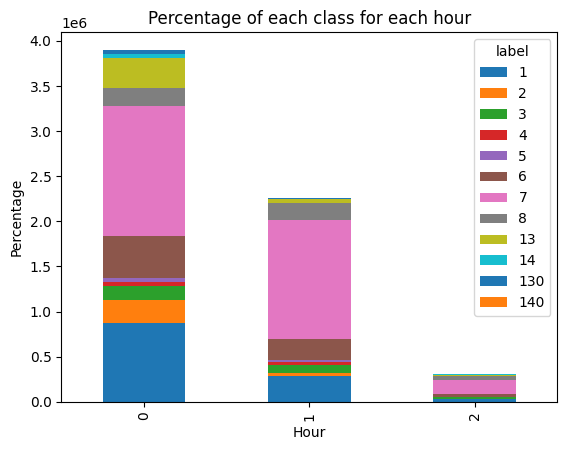

In [ ]:
df['label'].value_counts(normalize=True).plot(kind='bar')
plt.title('Percentage of each class')
plt.xlabel('Label')
plt.ylabel('Percentage')
plt.show()
#plot me for each hour of the "timestamp" column the count for each label normilized as a percentage of that hour
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df.groupby(['hour', 'label']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Percentage of each class for each hour')
plt.xlabel('Hour')
plt.ylabel('Percentage')
plt.show()
#drop the "hour" column
df.drop(columns=['hour'], inplace=True)

In [ ]:
for tempdf in df_list:
    tempdf['timestamp'] = pd.to_datetime(tempdf['timestamp'])
    tempdf.loc[tempdf['timestamp'].dt.time > cutoff_time, 'timestamp'] -= pd.Timedelta(hours=13)

Κοιτώντας το correlation παρατηρούμε ότι δεν υπάρχει καμία ακραία τιμή. Οι μεγαλύτερες είναι οι back_x/thigh_x και thigh_x/thigh_z οι οποιές δεν είναι και ιδιαίτερα μεγάλες.

In [ ]:
tempdf = df.drop(columns=['timestamp','label'])
tempdf.corr()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z
back_x,1.000000,0.014058,-0.103727,0.435847,0.052864,-0.043389
back_y,0.014058,1.000000,0.027343,0.002271,-0.187453,0.017320
back_z,-0.103727,0.027343,1.000000,-0.105903,0.027760,-0.165214
thigh_x,0.435847,0.002271,-0.105903,1.000000,0.159553,0.429772
thigh_y,0.052864,-0.187453,0.027760,0.159553,1.000000,0.149124
thigh_z,-0.043389,0.017320,-0.165214,0.429772,0.149124,1.000000


Χωρίζουμε τα δεδομένα μας σε training data & test data ωστε να μπορέσουμε να υπολογίσουμε στατιστικα μεγέθη χωρίς να υπάρχει κίνδυνος για leakage.

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

In [ ]:
tempdf = train_df.drop(columns=['timestamp'])
means = tempdf.groupby(['label']).mean()
stds = tempdf.groupby(['label']).std()
vars = tempdf.groupby(['label']).var()

         back_x    back_y    back_z   thigh_x   thigh_y   thigh_z
label                                                            
1     -0.992579 -0.038823 -0.137832 -1.056772 -0.023669 -0.074534
2     -0.965023 -0.076435 -0.260119 -1.247031 -0.163706 -0.142771
3     -0.982419 -0.022123 -0.031324 -0.974453  0.020808 -0.067866
4     -0.960396 -0.033434 -0.064641 -1.016216  0.013374 -0.005192
5     -0.996425 -0.034357 -0.082388 -1.041728 -0.000104 -0.027013
6     -0.985737 -0.000291 -0.046284 -0.962619  0.017702 -0.122135
7     -0.919756  0.016039 -0.234691 -0.220881  0.062547  0.900047
8     -0.027695 -0.050257 -0.141218 -0.040161  0.046897  0.128213
13    -0.900172 -0.054796 -0.097916 -0.876715 -0.014312  0.009415
14    -0.823008 -0.108122 -0.260972 -1.038350 -0.071128 -0.070486
130   -0.856730 -0.055172 -0.043505 -0.851832 -0.002750 -0.090494
140   -0.901573 -0.136479 -0.451420 -0.888173 -0.071084 -0.057507
         back_x    back_y    back_z   thigh_x   thigh_y   thigh_z
label     

In [ ]:
features = [col for col in train_df.columns if col not in ['timestamp', 'label']]
X_train = train_df[features]
y_train = train_df['label']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

NameError: name 'train_stats' is not defined